Student Perfomance  Analysis 

In [2]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [2]:
# Install seaborn
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# =============================================================================
# CELL 2: IMPORT LIBRARIES
# =============================================================================

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
from ucimlrepo import fetch_ucirepo

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [4]:
# =============================================================================
# CELL 2: LOAD DATASET
# =============================================================================

# Fetch dataset from UCI repository
student_performance = fetch_ucirepo(id=320)

# Extract features and targets
X = student_performance.data.features
y = student_performance.data.targets

# Combine features and targets into one dataframe
df = pd.concat([X, y], axis=1)

print("✅ Dataset loaded successfully!")
print(f"📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

✅ Dataset loaded successfully!
📊 Dataset Shape: 649 rows × 33 columns


In [5]:
# =============================================================================
# CELL 3: PROGRAM QUESTIONS (M&E Framework)
# =============================================================================

print("=" * 70)
print("🧭 PROGRAM EVALUATION QUESTIONS")
print("=" * 70)

questions = {
    "Q1": "What factors most strongly correlate with final student performance (G3)?",
    "Q2": "Is there a performance gap between students who receive family support (famsup) and those who don't?",
    "Q3": "How does student attendance (absences) relate to their period grades (G1, G2, G3)?",
    "Q4": "Does mother's education level (Medu) impact student performance?",
    "Q5": "How does study time affect final grades?"
}

for key, question in questions.items():
    print(f"\n{key}: {question}")

print("\n" + "=" * 70)

🧭 PROGRAM EVALUATION QUESTIONS

Q1: What factors most strongly correlate with final student performance (G3)?

Q2: Is there a performance gap between students who receive family support (famsup) and those who don't?

Q3: How does student attendance (absences) relate to their period grades (G1, G2, G3)?

Q4: Does mother's education level (Medu) impact student performance?

Q5: How does study time affect final grades?



In [6]:
# =============================================================================
# CELL 4: INITIAL DATA EXPLORATION
# =============================================================================

print("📋 FIRST 5 ROWS OF DATA:")
print("-" * 70)
display(df.head())

print("\n📋 LAST 5 ROWS OF DATA:")
print("-" * 70)
display(df.tail())

📋 FIRST 5 ROWS OF DATA:
----------------------------------------------------------------------


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13



📋 LAST 5 ROWS OF DATA:
----------------------------------------------------------------------


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,4,10,11,11


In [7]:
# =============================================================================
# CELL 5: DATA INFORMATION
# =============================================================================

print("📊 DATASET INFORMATION:")
print("-" * 70)
print(df.info())

print("\n" + "-" * 70)
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

📊 DATASET INFORMATION:
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 

In [8]:
# =============================================================================
# CELL 6: CHECK DATA TYPES
# =============================================================================

print("🔍 DATA TYPES SUMMARY:")
print("-" * 70)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n📈 Numerical Columns ({len(numerical_cols)}):")
print(numerical_cols)

print(f"\n📝 Categorical Columns ({len(categorical_cols)}):")
print(categorical_cols)

🔍 DATA TYPES SUMMARY:
----------------------------------------------------------------------

📈 Numerical Columns (16):
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

📝 Categorical Columns (17):
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [9]:
# =============================================================================
# CELL 7: CHECK MISSING VALUES
# =============================================================================

print("🔍 MISSING VALUES CHECK:")
print("-" * 70)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Show only columns with missing values
missing_df_filtered = missing_df[missing_df['Missing Values'] > 0]

if len(missing_df_filtered) == 0:
    print("✅ No missing values found in the dataset!")
else:
    print("⚠️ Missing values found:")
    display(missing_df_filtered)

print(f"\nTotal missing values: {df.isnull().sum().sum()}")

🔍 MISSING VALUES CHECK:
----------------------------------------------------------------------
✅ No missing values found in the dataset!

Total missing values: 0


In [10]:
# =============================================================================
# CELL 8: CHECK FOR DUPLICATES
# =============================================================================

print("🔍 DUPLICATE ROWS CHECK:")
print("-" * 70)

duplicates = df.duplicated().sum()

if duplicates == 0:
    print("✅ No duplicate rows found!")
else:
    print(f"⚠️ Found {duplicates} duplicate rows")
    # Remove duplicates if needed
    # df = df.drop_duplicates()
    # print("Duplicates removed!")

🔍 DUPLICATE ROWS CHECK:
----------------------------------------------------------------------
✅ No duplicate rows found!


In [11]:
# =============================================================================
# CELL 9: STATISTICAL SUMMARY
# =============================================================================

print("📊 STATISTICAL SUMMARY OF NUMERICAL VARIABLES:")
print("-" * 70)

display(df.describe().T.round(2))

📊 STATISTICAL SUMMARY OF NUMERICAL VARIABLES:
----------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
age,649.0,16.74,1.22,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.51,1.13,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.31,1.10,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.57,0.75,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.93,0.83,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.22,0.59,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.93,0.96,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.18,1.05,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.18,1.18,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.50,0.92,1.0,1.0,1.0,2.0,5.0


In [12]:
# =============================================================================
# CELL 10: DATA PREPARATION - CREATE PASS/FAIL COLUMN
# =============================================================================

print("🔧 DATA PREPARATION:")
print("-" * 70)

# Create pass/fail column (G3 >= 10 is Pass)
df['pass_fail'] = df['G3'].apply(lambda x: 'Pass' if x >= 10 else 'Fail')

# Create numeric version for analysis
df['passed'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Create grade category
def grade_category(grade):
    if grade >= 16:
        return 'Excellent'
    elif grade >= 14:
        return 'Good'
    elif grade >= 12:
        return 'Satisfactory'
    elif grade >= 10:
        return 'Sufficient'
    else:
        return 'Fail'

df['grade_category'] = df['G3'].apply(grade_category)

print("✅ New columns created:")
print("   - 'pass_fail': Pass if G3 >= 10, else Fail")
print("   - 'passed': 1 if Pass, 0 if Fail")
print("   - 'grade_category': Excellent/Good/Satisfactory/Sufficient/Fail")

print("\n📊 Pass/Fail Distribution:")
print(df['pass_fail'].value_counts())

print("\n📊 Grade Category Distribution:")
print(df['grade_category'].value_counts())

🔧 DATA PREPARATION:
----------------------------------------------------------------------
✅ New columns created:
   - 'pass_fail': Pass if G3 >= 10, else Fail
   - 'passed': 1 if Pass, 0 if Fail
   - 'grade_category': Excellent/Good/Satisfactory/Sufficient/Fail

📊 Pass/Fail Distribution:
pass_fail
Pass    549
Fail    100
Name: count, dtype: int64

📊 Grade Category Distribution:
grade_category
Sufficient      201
Satisfactory    154
Good            112
Fail            100
Excellent        82
Name: count, dtype: int64


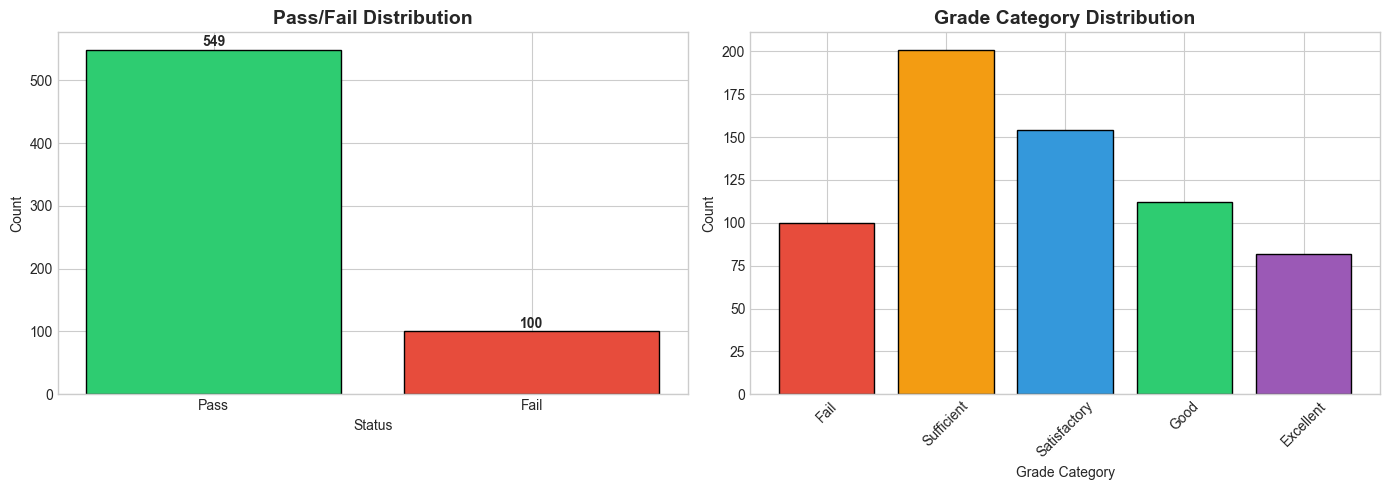

In [13]:
# =============================================================================
# CELL 11: VISUALIZE PASS/FAIL DISTRIBUTION
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Pass/Fail Count
colors = ['#2ecc71', '#e74c3c']
pass_fail_counts = df['pass_fail'].value_counts()
axes[0].bar(pass_fail_counts.index, pass_fail_counts.values, color=colors, edgecolor='black')
axes[0].set_title('Pass/Fail Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Count')
for i, v in enumerate(pass_fail_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Plot 2: Grade Category Distribution
grade_order = ['Fail', 'Sufficient', 'Satisfactory', 'Good', 'Excellent']
grade_counts = df['grade_category'].value_counts().reindex(grade_order)
colors2 = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71', '#9b59b6']
axes[1].bar(grade_counts.index, grade_counts.values, color=colors2, edgecolor='black')
axes[1].set_title('Grade Category Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Grade Category')
axes[1].set_ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

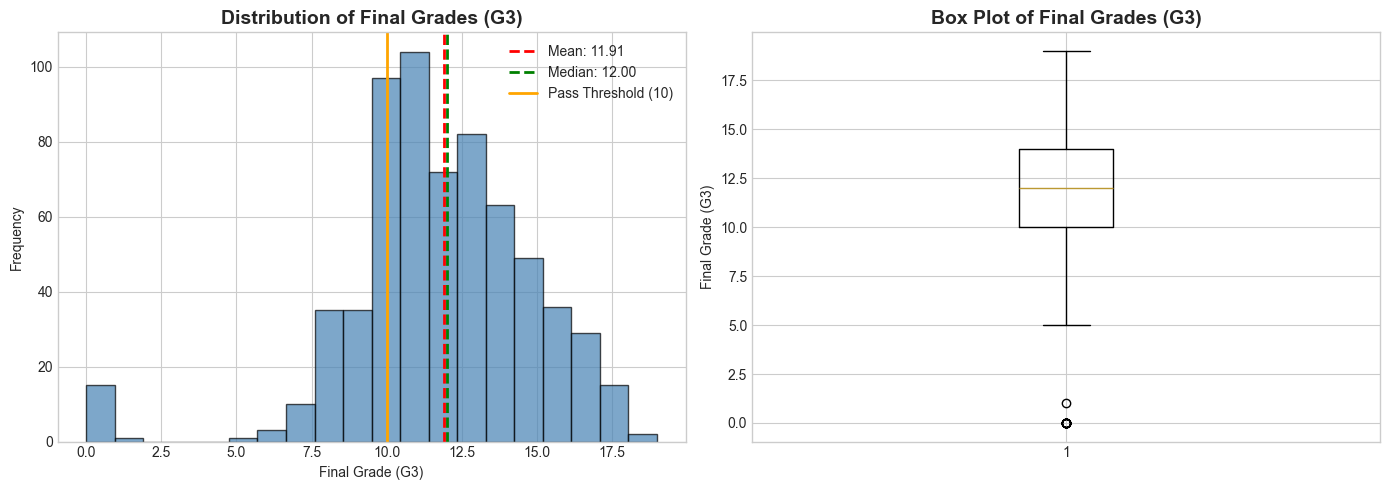

📊 Final Grade (G3) Statistics:
   Mean: 11.91
   Median: 12.00
   Std Dev: 3.23
   Min: 0
   Max: 19


In [14]:
# =============================================================================
# CELL 12: DISTRIBUTION OF FINAL GRADES (G3)
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['G3'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['G3'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["G3"].mean():.2f}')
axes[0].axvline(df['G3'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["G3"].median():.2f}')
axes[0].axvline(10, color='orange', linestyle='-', linewidth=2, label='Pass Threshold (10)')
axes[0].set_title('Distribution of Final Grades (G3)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Final Grade (G3)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Box plot
axes[1].boxplot(df['G3'], vert=True)
axes[1].set_title('Box Plot of Final Grades (G3)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

print(f"📊 Final Grade (G3) Statistics:")
print(f"   Mean: {df['G3'].mean():.2f}")
print(f"   Median: {df['G3'].median():.2f}")
print(f"   Std Dev: {df['G3'].std():.2f}")
print(f"   Min: {df['G3'].min()}")
print(f"   Max: {df['G3'].max()}")

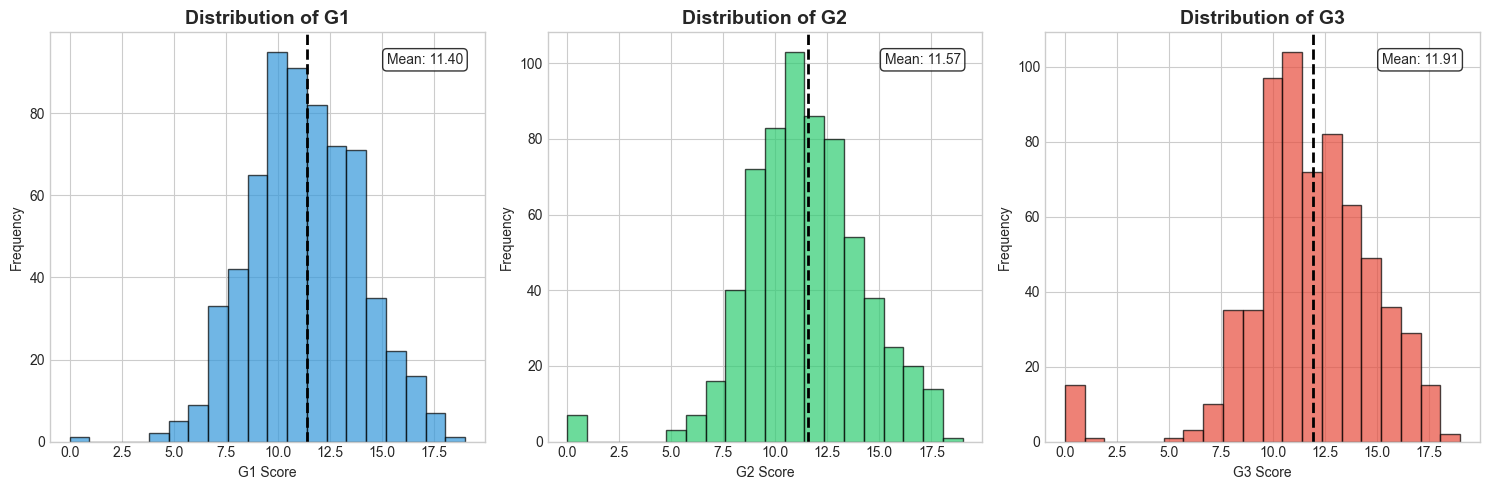

In [15]:
# =============================================================================
# CELL 13: DISTRIBUTION OF ALL THREE GRADES (G1, G2, G3)
# =============================================================================

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

grades = ['G1', 'G2', 'G3']
colors = ['#3498db', '#2ecc71', '#e74c3c']

for i, (grade, color) in enumerate(zip(grades, colors)):
    axes[i].hist(df[grade], bins=20, color=color, edgecolor='black', alpha=0.7)
    axes[i].axvline(df[grade].mean(), color='black', linestyle='--', linewidth=2)
    axes[i].set_title(f'Distribution of {grade}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(f'{grade} Score')
    axes[i].set_ylabel('Frequency')
    axes[i].text(0.95, 0.95, f'Mean: {df[grade].mean():.2f}', 
                 transform=axes[i].transAxes, ha='right', va='top',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

📊 CORRELATION ANALYSIS:
----------------------------------------------------------------------


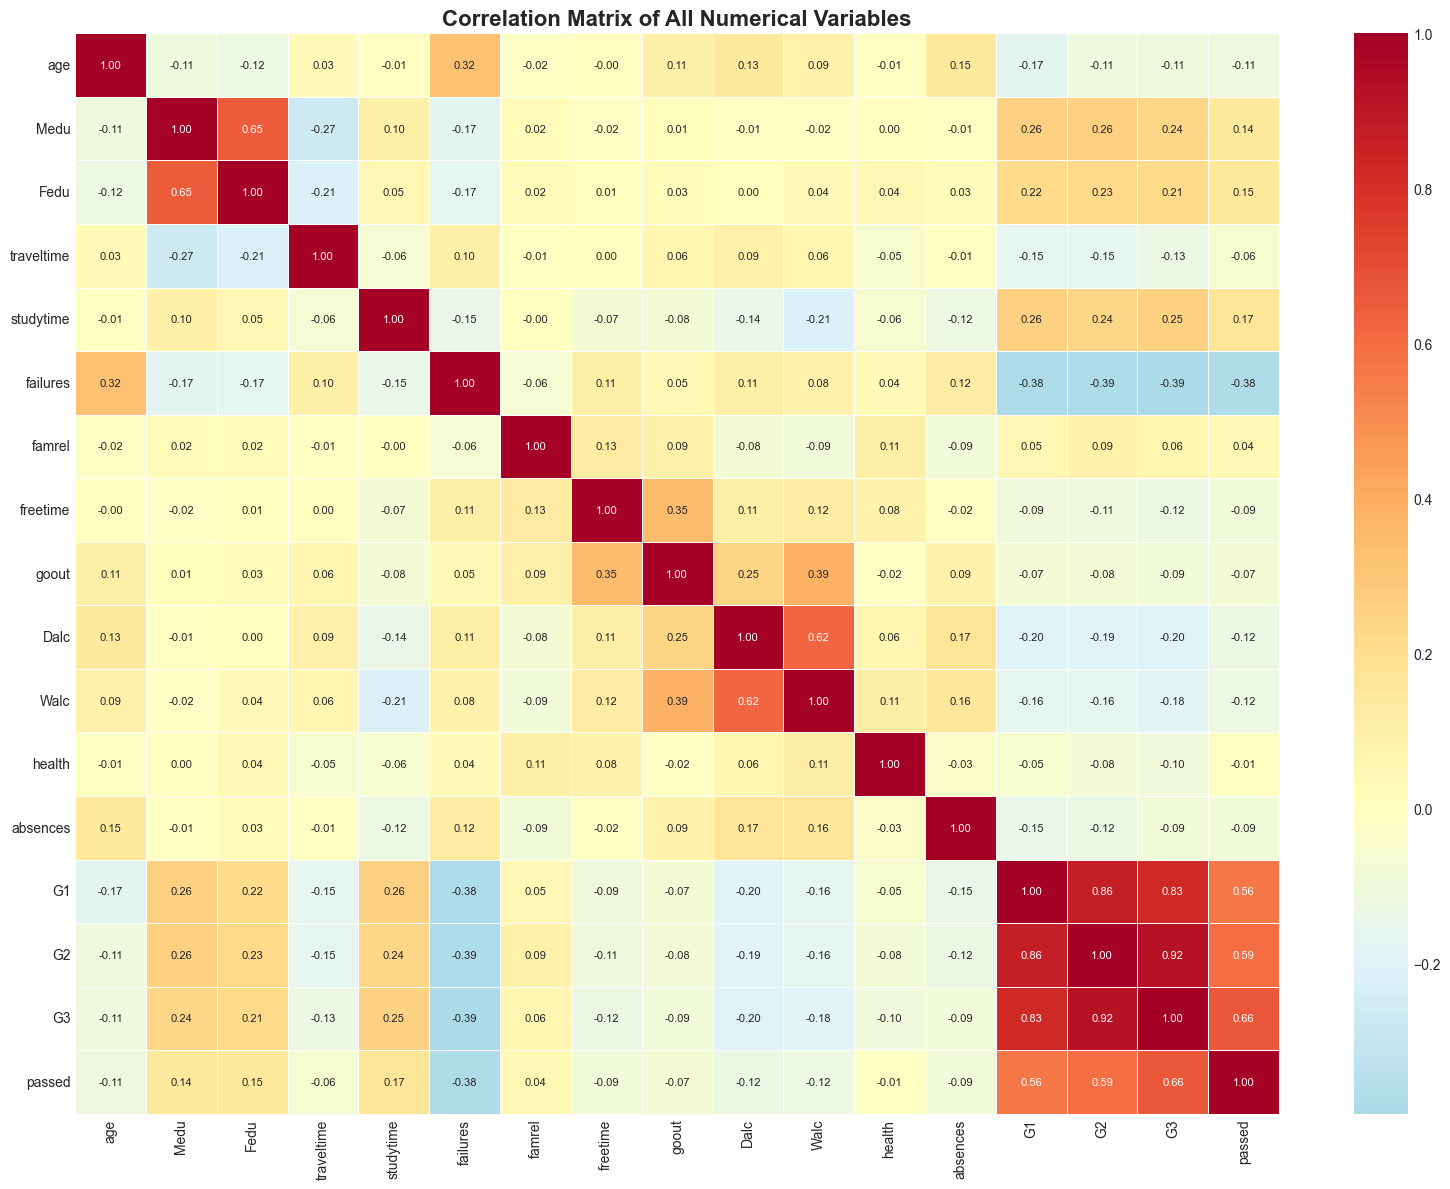

In [17]:
# =============================================================================
# CELL 14: CORRELATION ANALYSIS
# =============================================================================

print("📊 CORRELATION ANALYSIS:")
print("-" * 70)

# Select numerical columns for correlation
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlBu_r', 
            center=0, linewidths=0.5, annot_kws={'size': 8})
plt.title('Correlation Matrix of All Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

📊 FACTORS CORRELATED WITH FINAL GRADE (G3):
----------------------------------------------------------------------


,Variable,Correlation
0,G2,0.918548
1,G1,0.826387
2,passed,0.663157
3,studytime,0.249789
4,Medu,0.240151
5,Fedu,0.211800
6,famrel,0.063361
7,goout,-0.087641
8,absences,-0.091379
9,health,-0.098851


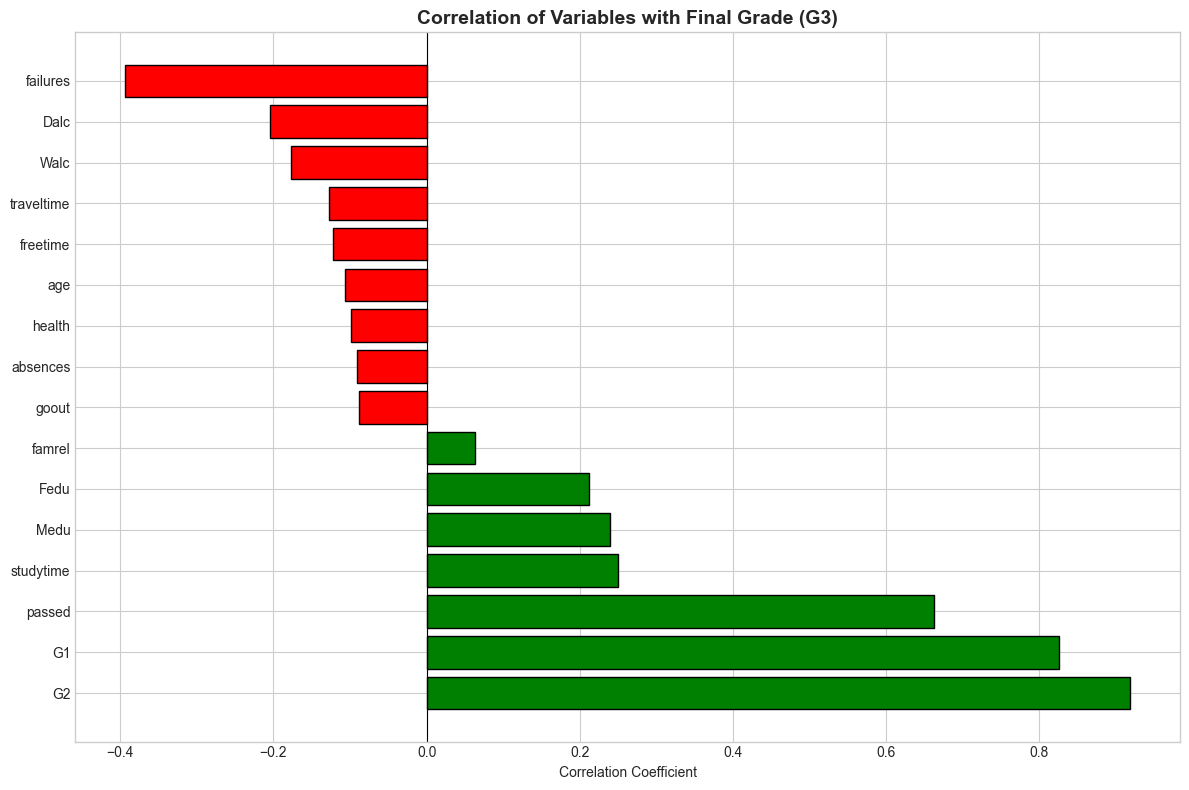


🔑 KEY FINDINGS:
   Strongest Positive: G2 (0.919)
   Strongest Negative: failures (-0.393)


In [18]:
# =============================================================================
# CELL 15: CORRELATION WITH FINAL GRADE (G3)
# =============================================================================

print("📊 FACTORS CORRELATED WITH FINAL GRADE (G3):")
print("-" * 70)

# Get correlations with G3
g3_correlations = correlation_matrix['G3'].drop('G3').sort_values(ascending=False)

# Create a dataframe for display
corr_df = pd.DataFrame({
    'Variable': g3_correlations.index,
    'Correlation': g3_correlations.values
})

display(corr_df)

# Visualize correlations
plt.figure(figsize=(12, 8))
colors = ['green' if x > 0 else 'red' for x in g3_correlations.values]
plt.barh(g3_correlations.index, g3_correlations.values, color=colors, edgecolor='black')
plt.axvline(x=0, color='black', linewidth=0.8)
plt.xlabel('Correlation Coefficient')
plt.title('Correlation of Variables with Final Grade (G3)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔑 KEY FINDINGS:")
print(f"   Strongest Positive: {g3_correlations.idxmax()} ({g3_correlations.max():.3f})")
print(f"   Strongest Negative: {g3_correlations.idxmin()} ({g3_correlations.min():.3f})")

📊 Q2: FAMILY SUPPORT VS STUDENT PERFORMANCE
----------------------------------------------------------------------

📈 Statistics by Family Support:


,mean,median,std,count
famsup,,,,
no,11.665339,12.0,3.602160,251
yes,12.057789,12.0,2.967358,398


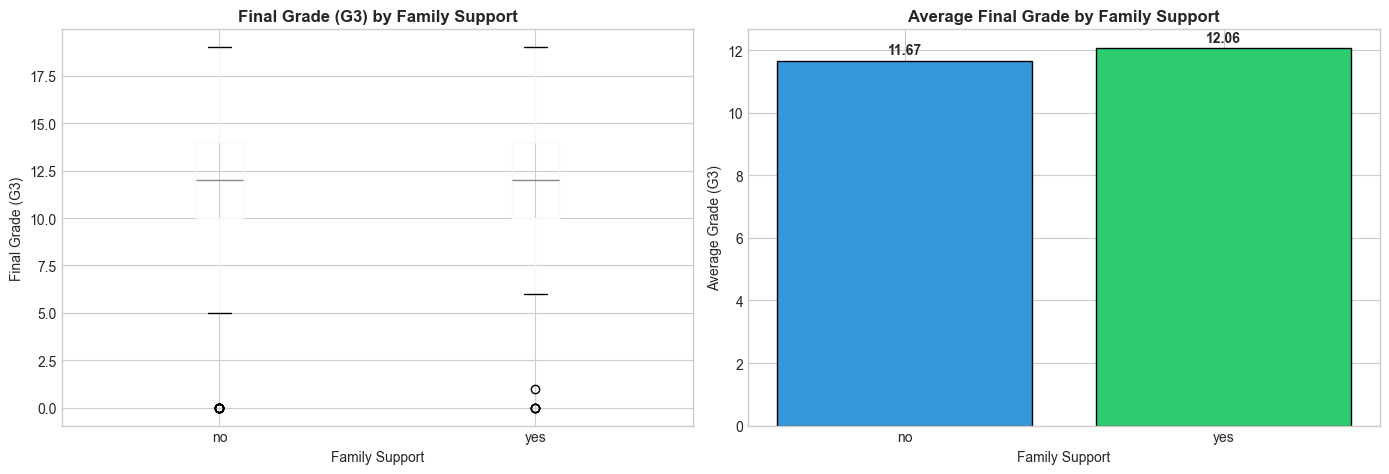


📊 Pass Rate by Family Support:
   Family Support = no: 82.9% pass rate
   Family Support = yes: 85.7% pass rate


In [19]:
# =============================================================================
# CELL 16: Q2 - FAMILY SUPPORT (famsup) ANALYSIS
# =============================================================================

print("📊 Q2: FAMILY SUPPORT VS STUDENT PERFORMANCE")
print("-" * 70)

# Check if famsup exists
if 'famsup' in df.columns:
    # Group by family support
    famsup_analysis = df.groupby('famsup')['G3'].agg(['mean', 'median', 'std', 'count'])
    print("\n📈 Statistics by Family Support:")
    display(famsup_analysis)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Box plot
    df.boxplot(column='G3', by='famsup', ax=axes[0])
    axes[0].set_title('Final Grade (G3) by Family Support', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Family Support')
    axes[0].set_ylabel('Final Grade (G3)')
    plt.suptitle('')  # Remove automatic title
    
    # Bar plot of means
    famsup_means = df.groupby('famsup')['G3'].mean()
    colors = ['#3498db', '#2ecc71']
    axes[1].bar(famsup_means.index, famsup_means.values, color=colors, edgecolor='black')
    axes[1].set_title('Average Final Grade by Family Support', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Family Support')
    axes[1].set_ylabel('Average Grade (G3)')
    for i, v in enumerate(famsup_means.values):
        axes[1].text(i, v + 0.2, f'{v:.2f}', ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Pass rate by family support
    print("\n📊 Pass Rate by Family Support:")
    pass_rate = df.groupby('famsup')['passed'].mean() * 100
    for support, rate in pass_rate.items():
        print(f"   Family Support = {support}: {rate:.1f}% pass rate")
else:
    print("⚠️ 'famsup' column not found in dataset")

📊 Q3: STUDENT ATTENDANCE (ABSENCES) VS GRADES
----------------------------------------------------------------------


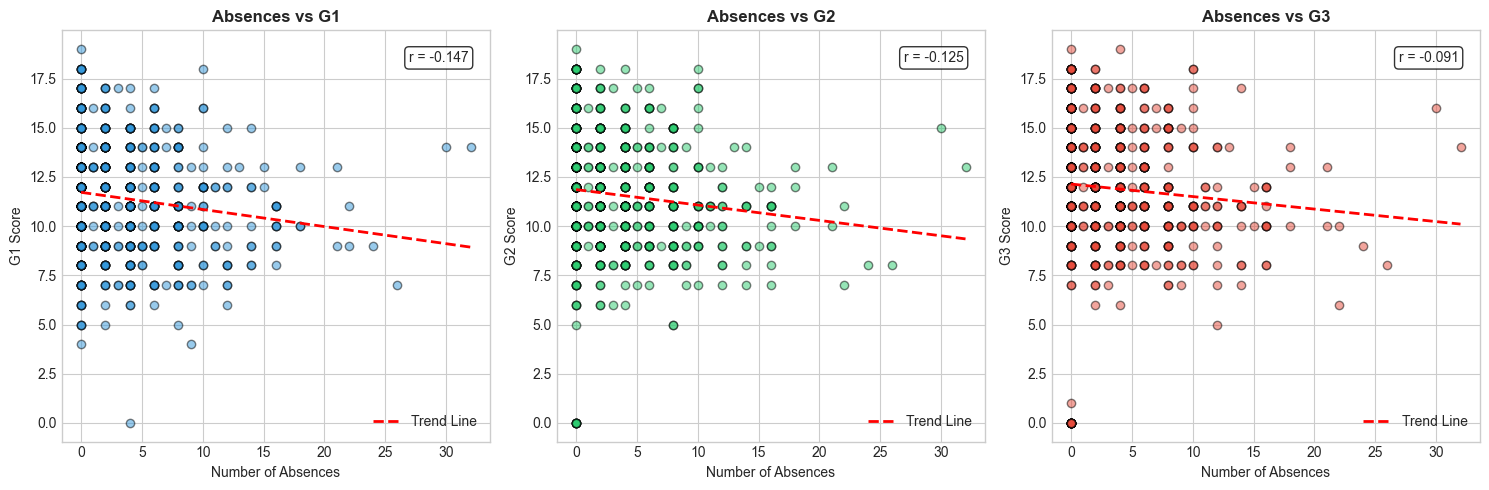


📊 Correlation between Absences and Grades:
   Absences vs G1: r = -0.147
   Absences vs G2: r = -0.125
   Absences vs G3: r = -0.091


In [20]:
# =============================================================================
# CELL 17: Q3 - ABSENCES VS GRADES ANALYSIS
# =============================================================================

print("📊 Q3: STUDENT ATTENDANCE (ABSENCES) VS GRADES")
print("-" * 70)

# Scatter plots for absences vs grades
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

grades = ['G1', 'G2', 'G3']
colors = ['#3498db', '#2ecc71', '#e74c3c']

for i, (grade, color) in enumerate(zip(grades, colors)):
    axes[i].scatter(df['absences'], df[grade], alpha=0.5, color=color, edgecolor='black')
    
    # Add trend line
    z = np.polyfit(df['absences'], df[grade], 1)
    p = np.poly1d(z)
    axes[i].plot(df['absences'].sort_values(), p(df['absences'].sort_values()), 
                 color='red', linestyle='--', linewidth=2, label='Trend Line')
    
    axes[i].set_title(f'Absences vs {grade}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Number of Absences')
    axes[i].set_ylabel(f'{grade} Score')
    axes[i].legend()
    
    # Add correlation coefficient
    corr = df['absences'].corr(df[grade])
    axes[i].text(0.95, 0.95, f'r = {corr:.3f}', transform=axes[i].transAxes, 
                 ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n📊 Correlation between Absences and Grades:")
for grade in grades:
    corr = df['absences'].corr(df[grade])
    print(f"   Absences vs {grade}: r = {corr:.3f}")

📊 Final Grade by Absence Category:


,mean,median,count
absence_category,,,
0 (None),12.040984,13.0,244
1-5 (Low),12.055556,12.0,234
11+ (High),10.653061,10.0,49
6-10 (Medium),11.852459,11.0,122


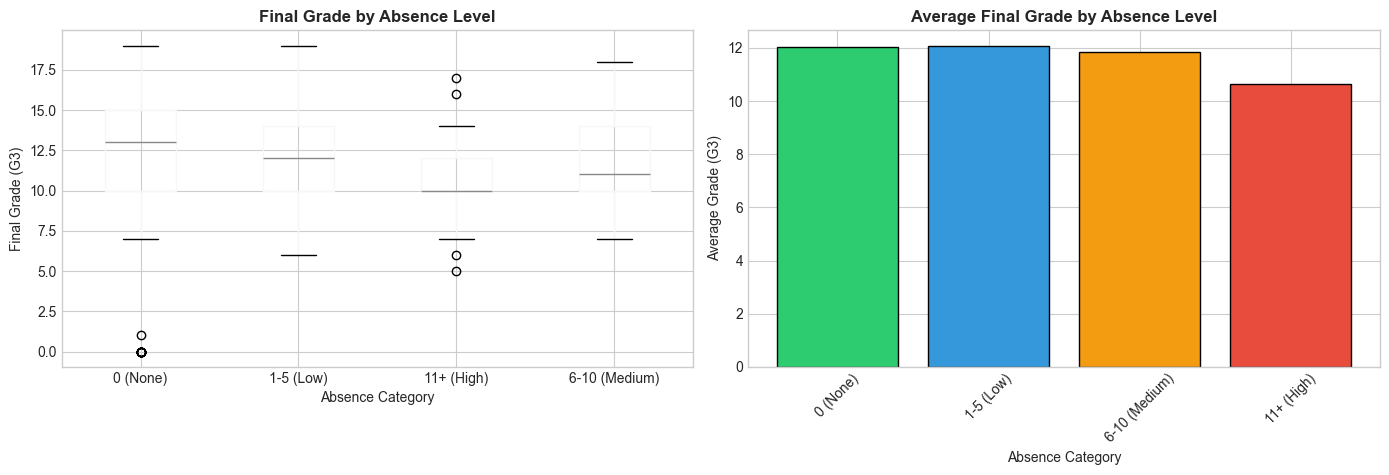

In [21]:
# =============================================================================
# CELL 18: ABSENCES CATEGORIES ANALYSIS
# =============================================================================

# Create absence categories
def absence_category(absences):
    if absences == 0:
        return '0 (None)'
    elif absences <= 5:
        return '1-5 (Low)'
    elif absences <= 10:
        return '6-10 (Medium)'
    else:
        return '11+ (High)'

df['absence_category'] = df['absences'].apply(absence_category)

# Analysis by absence category
absence_analysis = df.groupby('absence_category')['G3'].agg(['mean', 'median', 'count'])
print("📊 Final Grade by Absence Category:")
display(absence_analysis)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

order = ['0 (None)', '1-5 (Low)', '6-10 (Medium)', '11+ (High)']

# Box plot
df.boxplot(column='G3', by='absence_category', ax=axes[0], positions=[0, 1, 2, 3])
axes[0].set_title('Final Grade by Absence Level', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Absence Category')
axes[0].set_ylabel('Final Grade (G3)')
plt.suptitle('')

# Mean bar plot
absence_means = df.groupby('absence_category')['G3'].mean().reindex(order)
colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
axes[1].bar(range(len(absence_means)), absence_means.values, color=colors, edgecolor='black')
axes[1].set_xticks(range(len(absence_means)))
axes[1].set_xticklabels(order, rotation=45)
axes[1].set_title('Average Final Grade by Absence Level', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Absence Category')
axes[1].set_ylabel('Average Grade (G3)')

plt.tight_layout()
plt.show()

📊 Q4: MOTHER'S EDUCATION LEVEL VS STUDENT PERFORMANCE
----------------------------------------------------------------------

📈 Statistics by Mother's Education Level:


,mean,median,std,count
Medu,,,,
0,11.666667,11.0,1.751190,6
1,10.797203,11.0,3.163523,143
2,11.661290,12.0,3.061232,186
3,11.920863,12.0,3.123229,139
4,13.068571,13.0,3.236978,175


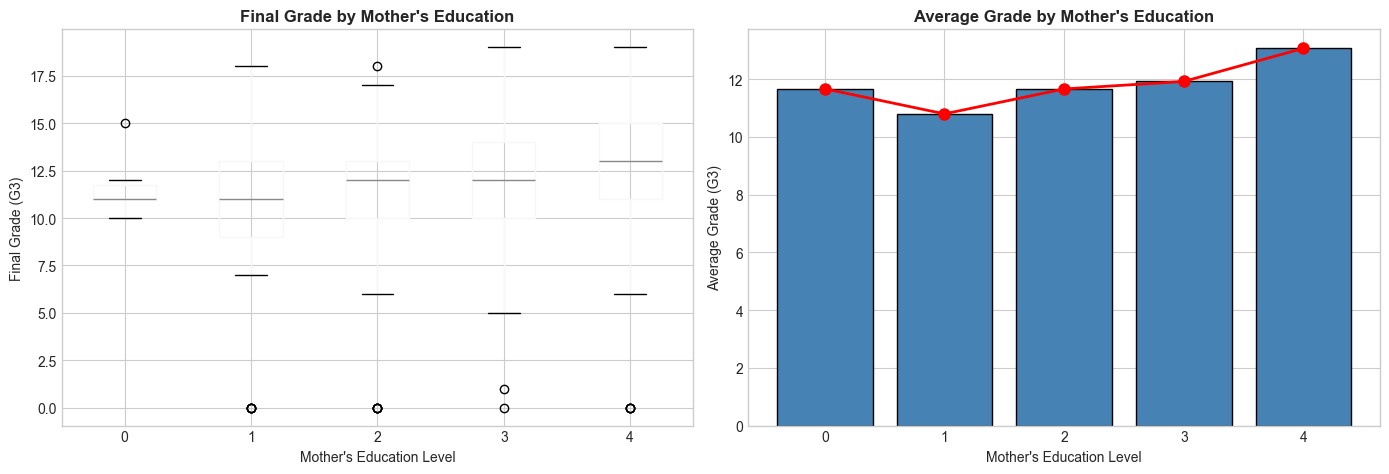


📊 Correlation between Mother's Education and G3: r = 0.240


In [22]:
# =============================================================================
# CELL 19: MOTHER'S EDUCATION (Medu) ANALYSIS
# =============================================================================

print("📊 Q4: MOTHER'S EDUCATION LEVEL VS STUDENT PERFORMANCE")
print("-" * 70)

if 'Medu' in df.columns:
    # Define education labels
    edu_labels = {
        0: '0 - None',
        1: '1 - Primary (4th grade)',
        2: '2 - 5th to 9th grade',
        3: '3 - Secondary',
        4: '4 - Higher Education'
    }
    
    df['Medu_label'] = df['Medu'].map(edu_labels)
    
    # Analysis
    medu_analysis = df.groupby('Medu')['G3'].agg(['mean', 'median', 'std', 'count'])
    print("\n📈 Statistics by Mother's Education Level:")
    display(medu_analysis)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Box plot
    df.boxplot(column='G3', by='Medu', ax=axes[0])
    axes[0].set_title("Final Grade by Mother's Education", fontsize=12, fontweight='bold')
    axes[0].set_xlabel("Mother's Education Level")
    axes[0].set_ylabel('Final Grade (G3)')
    plt.suptitle('')
    
    # Mean trend
    medu_means = df.groupby('Medu')['G3'].mean()
    axes[1].bar(medu_means.index, medu_means.values, color='steelblue', edgecolor='black')
    axes[1].plot(medu_means.index, medu_means.values, 'ro-', linewidth=2, markersize=8)
    axes[1].set_title("Average Grade by Mother's Education", fontsize=12, fontweight='bold')
    axes[1].set_xlabel("Mother's Education Level")
    axes[1].set_ylabel('Average Grade (G3)')
    
    plt.tight_layout()
    plt.show()
    
    # Correlation
    corr = df['Medu'].corr(df['G3'])
    print(f"\n📊 Correlation between Mother's Education and G3: r = {corr:.3f}")
else:
    print("⚠️ 'Medu' column not found in dataset")

📊 Q5: STUDY TIME VS FINAL GRADES
----------------------------------------------------------------------

📈 Statistics by Study Time:


,mean,median,std,count
studytime,,,,
1,10.844340,11.0,3.218624,212
2,12.091803,12.0,3.243125,305
3,13.226804,13.0,2.502104,97
4,13.057143,13.0,3.038410,35


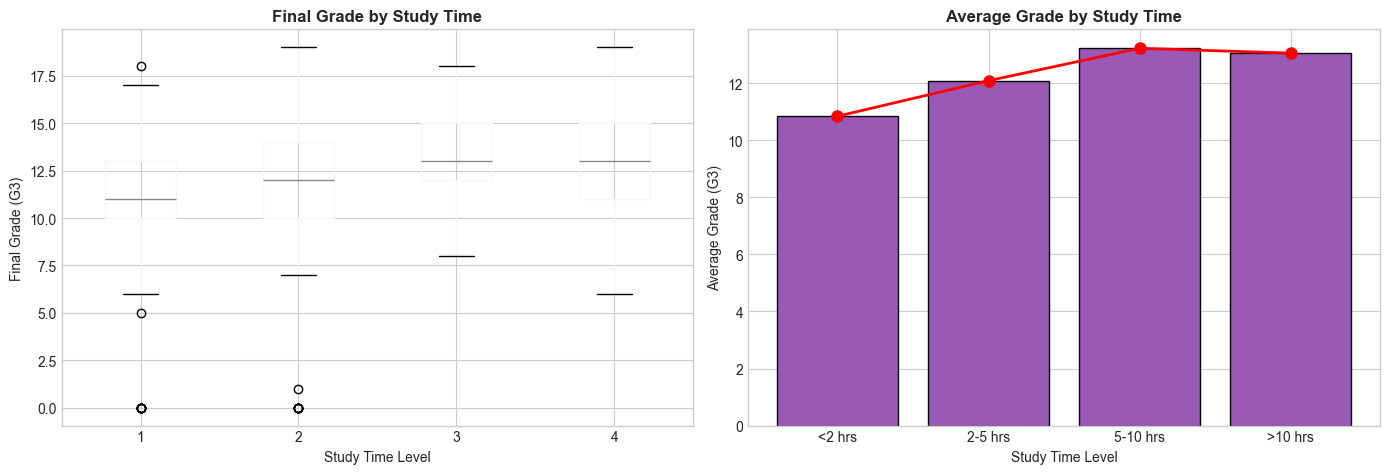


📊 Correlation between Study Time and G3: r = 0.250


In [23]:
# =============================================================================
# CELL 20: STUDY TIME ANALYSIS
# =============================================================================

print("📊 Q5: STUDY TIME VS FINAL GRADES")
print("-" * 70)

if 'studytime' in df.columns:
    # Define study time labels
    study_labels = {
        1: '1 - <2 hours',
        2: '2 - 2-5 hours',
        3: '3 - 5-10 hours',
        4: '4 - >10 hours'
    }
    
    df['studytime_label'] = df['studytime'].map(study_labels)
    
    # Analysis
    study_analysis = df.groupby('studytime')['G3'].agg(['mean', 'median', 'std', 'count'])
    print("\n📈 Statistics by Study Time:")
    display(study_analysis)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Box plot
    df.boxplot(column='G3', by='studytime', ax=axes[0])
    axes[0].set_title('Final Grade by Study Time', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Study Time Level')
    axes[0].set_ylabel('Final Grade (G3)')
    plt.suptitle('')
    
    # Bar plot with trend
    study_means = df.groupby('studytime')['G3'].mean()
    axes[1].bar(study_means.index, study_means.values, color='#9b59b6', edgecolor='black')
    axes[1].plot(study_means.index, study_means.values, 'ro-', linewidth=2, markersize=8)
    axes[1].set_title('Average Grade by Study Time', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Study Time Level')
    axes[1].set_ylabel('Average Grade (G3)')
    axes[1].set_xticks([1, 2, 3, 4])
    axes[1].set_xticklabels(['<2 hrs', '2-5 hrs', '5-10 hrs', '>10 hrs'])
    
    plt.tight_layout()
    plt.show()
    
    # Correlation
    corr = df['studytime'].corr(df['G3'])
    print(f"\n📊 Correlation between Study Time and G3: r = {corr:.3f}")
else:
    print("⚠️ 'studytime' column not found in dataset")

📊 ADDITIONAL: SCHOOL COMPARISON
----------------------------------------------------------------------

📈 Statistics by School:


,mean,median,std,count
school,,,,
GP,12.576832,13.0,2.625636,423
MS,10.650442,11.0,3.833991,226


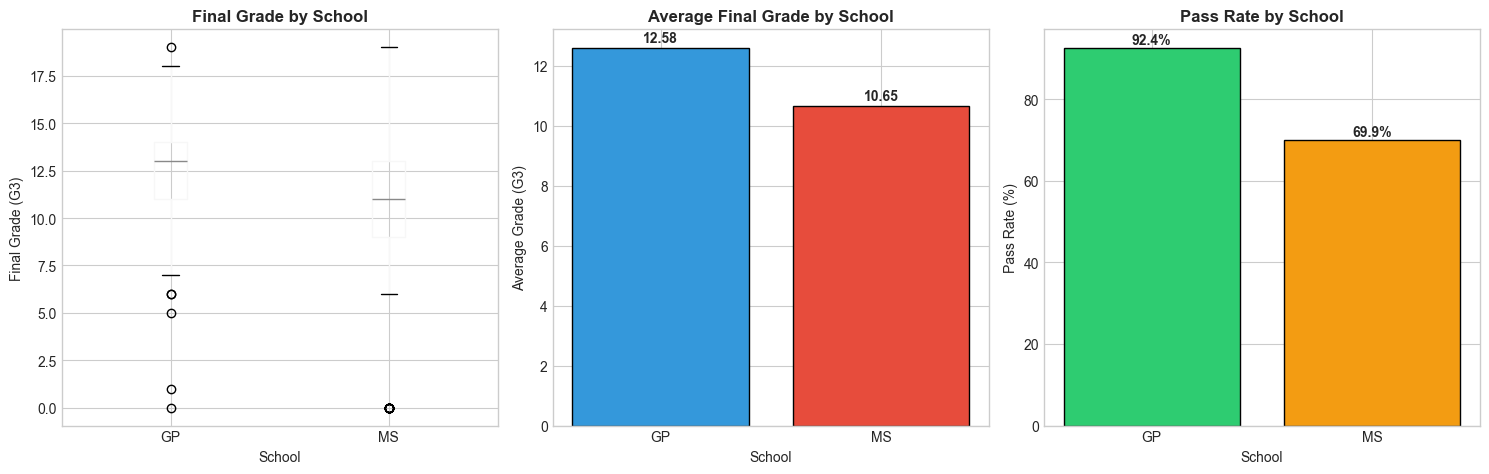

In [24]:
# =============================================================================
# CELL 21: SCHOOL COMPARISON ANALYSIS
# =============================================================================

print("📊 ADDITIONAL: SCHOOL COMPARISON")
print("-" * 70)

if 'school' in df.columns:
    # Analysis by school
    school_analysis = df.groupby('school')['G3'].agg(['mean', 'median', 'std', 'count'])
    print("\n📈 Statistics by School:")
    display(school_analysis)
    
    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Box plot
    df.boxplot(column='G3', by='school', ax=axes[0])
    axes[0].set_title('Final Grade by School', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('School')
    axes[0].set_ylabel('Final Grade (G3)')
    plt.suptitle('')
    
    # Mean comparison
    school_means = df.groupby('school')['G3'].mean()
    colors = ['#3498db', '#e74c3c']
    axes[1].bar(school_means.index, school_means.values, color=colors, edgecolor='black')
    axes[1].set_title('Average Final Grade by School', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('School')
    axes[1].set_ylabel('Average Grade (G3)')
    for i, v in enumerate(school_means.values):
        axes[1].text(i, v + 0.2, f'{v:.2f}', ha='center', fontweight='bold')
    
    # Pass rate comparison
    pass_rate = df.groupby('school')['passed'].mean() * 100
    axes[2].bar(pass_rate.index, pass_rate.values, color=['#2ecc71', '#f39c12'], edgecolor='black')
    axes[2].set_title('Pass Rate by School', fontsize=12, fontweight='bold')
    axes[2].set_xlabel('School')
    axes[2].set_ylabel('Pass Rate (%)')
    for i, v in enumerate(pass_rate.values):
        axes[2].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'school' column not found in dataset")

📊 PAIRPLOT OF KEY VARIABLES
----------------------------------------------------------------------


<Figure size 1200x1200 with 0 Axes>

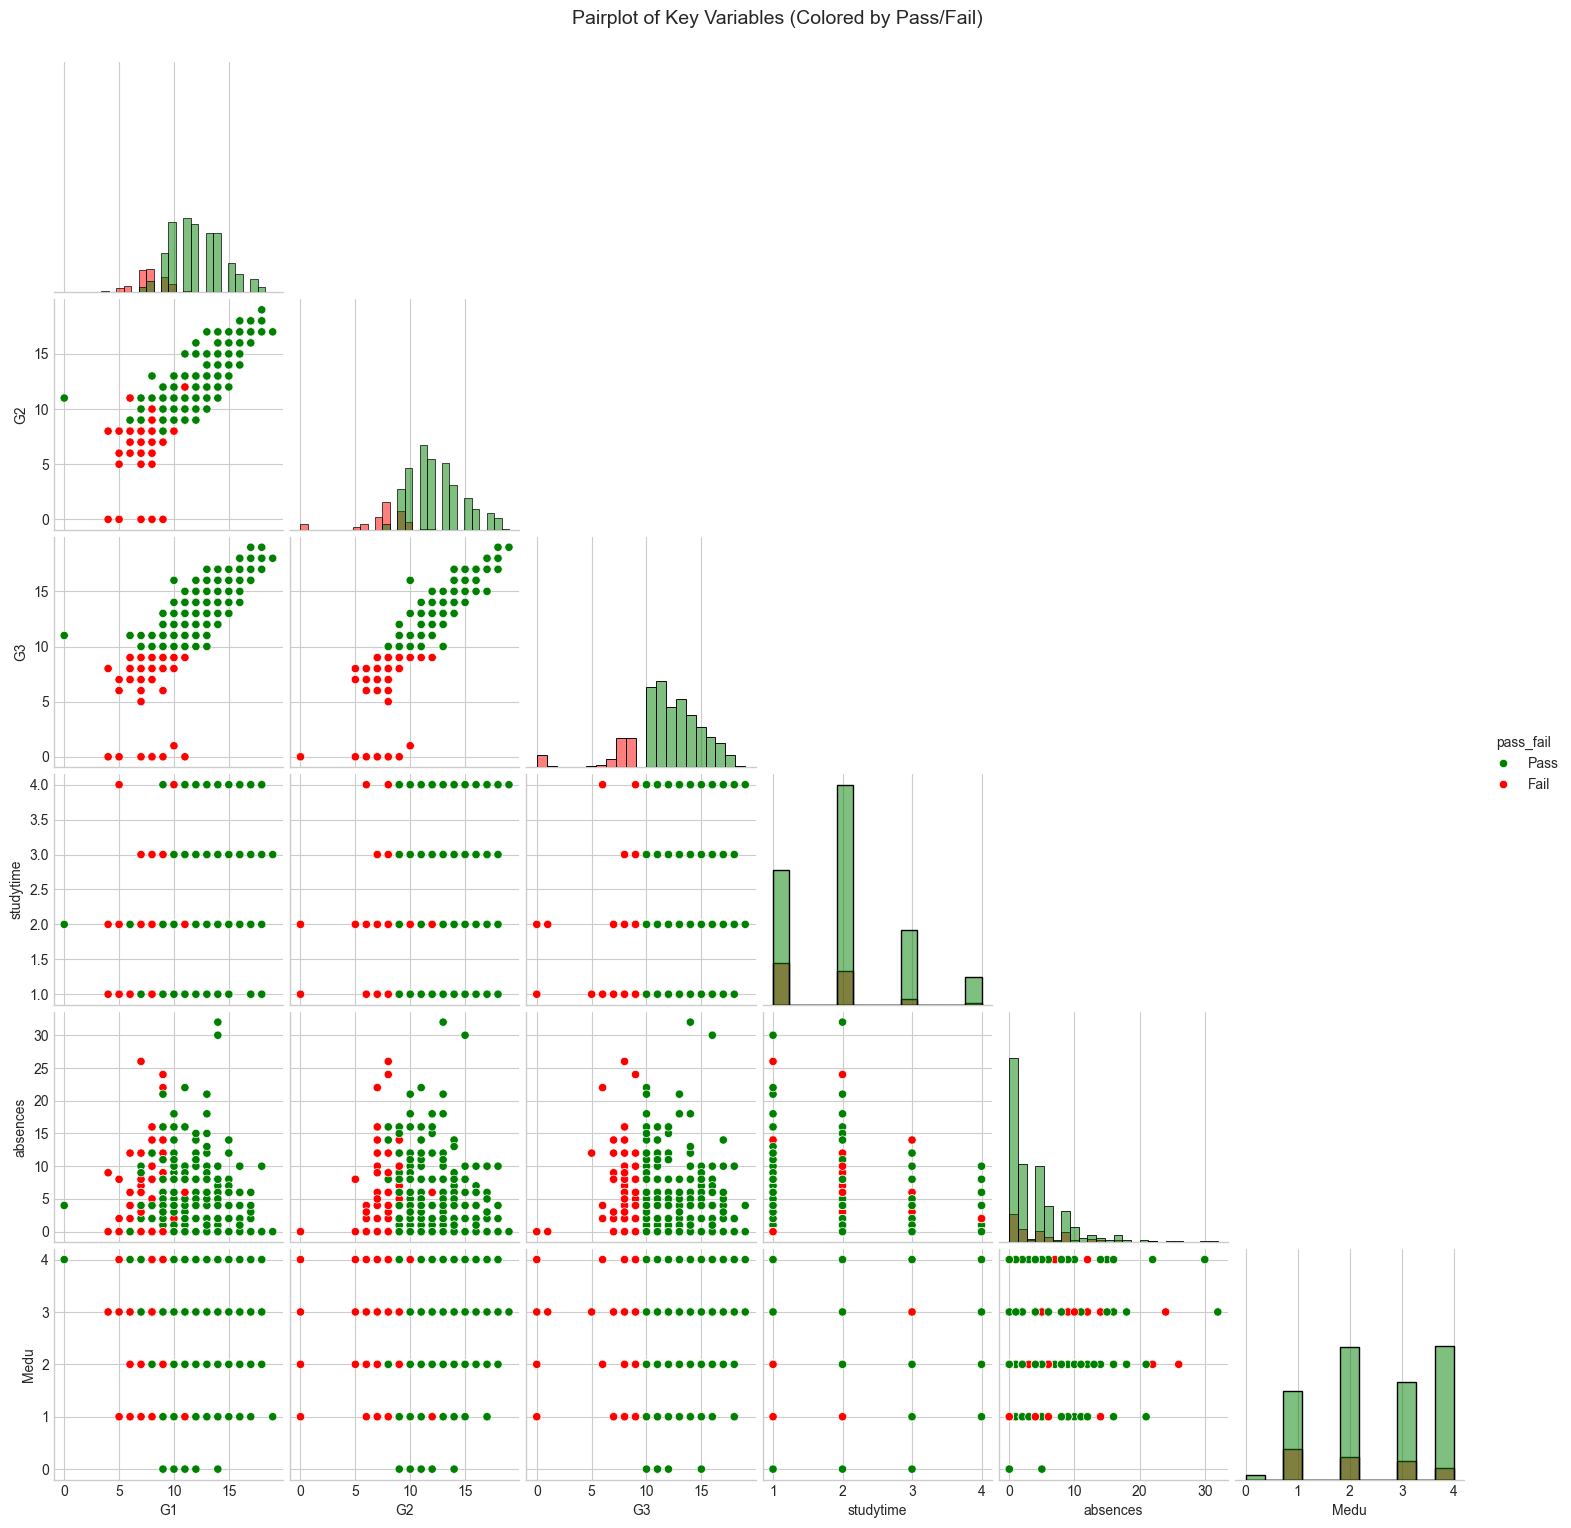

In [25]:
# =============================================================================
# CELL 22: PAIRPLOT OF KEY VARIABLES
# =============================================================================

print("📊 PAIRPLOT OF KEY VARIABLES")
print("-" * 70)

# Select key variables for pairplot
key_vars = ['G1', 'G2', 'G3', 'studytime', 'absences', 'Medu']

# Filter to existing columns
key_vars = [col for col in key_vars if col in df.columns]

# Create pairplot
plt.figure(figsize=(12, 12))
sns.pairplot(df[key_vars + ['pass_fail']], hue='pass_fail', 
             palette={'Pass': 'green', 'Fail': 'red'}, 
             diag_kind='hist', corner=True)
plt.suptitle('Pairplot of Key Variables (Colored by Pass/Fail)', y=1.02, fontsize=14)
plt.show()

In [26]:
# =============================================================================
# CELL 23: SUMMARY AND KEY FINDINGS
# =============================================================================

print("=" * 70)
print("📊 SUMMARY OF KEY FINDINGS")
print("=" * 70)

# Calculate key statistics
total_students = len(df)
pass_rate = (df['passed'].sum() / total_students) * 100
avg_grade = df['G3'].mean()

print(f"""
📌 DATASET OVERVIEW:
   - Total Students: {total_students}
   - Overall Pass Rate: {pass_rate:.1f}%
   - Average Final Grade (G3): {avg_grade:.2f}

📌 Q1: FACTORS CORRELATED WITH PERFORMANCE (G3):
   - Strongest predictors: G2, G1 (previous grades)
   - Mother's Education (Medu): r = {df['Medu'].corr(df['G3']):.3f}
   - Study Time: r = {df['studytime'].corr(df['G3']):.3f}
   - Absences: r = {df['absences'].corr(df['G3']):.3f}

📌 Q2: FAMILY SUPPORT IMPACT:
   - With family support: Mean G3 = {df[df['famsup']=='yes']['G3'].mean():.2f}
   - Without family support: Mean G3 = {df[df['famsup']=='no']['G3'].mean():.2f}

📌 Q3: ATTENDANCE IMPACT:
   - Absences have a negative correlation with grades
   - Students with fewer absences tend to perform better

📌 Q4: MOTHER'S EDUCATION:
   - Higher mother's education correlates with better student performance
   
📌 Q5: STUDY TIME:
   - More study time is associated with higher grades
""")

print("=" * 70)
print("✅ ANALYSIS COMPLETE!")
print("=" * 70)

📊 SUMMARY OF KEY FINDINGS

📌 DATASET OVERVIEW:
   - Total Students: 649
   - Overall Pass Rate: 84.6%
   - Average Final Grade (G3): 11.91

📌 Q1: FACTORS CORRELATED WITH PERFORMANCE (G3):
   - Strongest predictors: G2, G1 (previous grades)
   - Mother's Education (Medu): r = 0.240
   - Study Time: r = 0.250
   - Absences: r = -0.091

📌 Q2: FAMILY SUPPORT IMPACT:
   - With family support: Mean G3 = 12.06
   - Without family support: Mean G3 = 11.67

📌 Q3: ATTENDANCE IMPACT:
   - Absences have a negative correlation with grades
   - Students with fewer absences tend to perform better

📌 Q4: MOTHER'S EDUCATION:
   - Higher mother's education correlates with better student performance

📌 Q5: STUDY TIME:
   - More study time is associated with higher grades

✅ ANALYSIS COMPLETE!


In [27]:
# =============================================================================
# CELL 24: EXPORT CLEANED DATA (OPTIONAL)
# =============================================================================

# Save the cleaned and prepared dataset
# df.to_csv('student_performance_cleaned.csv', index=False)
# print("✅ Cleaned data exported to 'student_performance_cleaned.csv'")

# Display final dataframe info
print("📊 FINAL DATASET SUMMARY:")
print(f"   Shape: {df.shape}")
print(f"   Columns: {list(df.columns)}")

📊 FINAL DATASET SUMMARY:
   Shape: (649, 39)
   Columns: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'pass_fail', 'passed', 'grade_category', 'absence_category', 'Medu_label', 'studytime_label']


In [28]:
# =============================================================================
# SAVE RAW/UNCLEANED DATA
# =============================================================================

# Fetch dataset from UCI repository
student_performance = fetch_ucirepo(id=320)

# Extract features and targets
X = student_performance.data.features
y = student_performance.data.targets

# Combine features and targets into one dataframe
df_raw = pd.concat([X, y], axis=1)

# Save the raw/uncleaned data
df_raw.to_csv('student_performance_RAW.csv', index=False)

print("✅ Raw/Uncleaned data saved as 'student_performance_RAW.csv'")
print(f"📊 Shape: {df_raw.shape[0]} rows × {df_raw.shape[1]} columns")

✅ Raw/Uncleaned data saved as 'student_performance_RAW.csv'
📊 Shape: 649 rows × 33 columns
